References:
Dataset: IRIS Dataset


Four Features:features = ["sepal length","sepal width","petal length","petal width"]

Classes : Iris Setosa, Iris Versicolour, Iris Virginica

Model: 1[sign(Wx+b)=1]

Learning Algorithm: Perceptron Learning



<!-- https://archive.ics.uci.edu/ml/datasets/iris -->



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The image was created using google draw (also available in the report given part of the assignment)



**Three class Classification using 2 Perceptrons**

                Perceptron outputs value = 1 <W,x> + b >=0 
                Perceptron outputs value = 0 <W,x> + b <0
                
                Perceptron1 classifies as class 0 vs rest
                Perceptron1 has <W,x>+b >=0  for Iris Setosa/Class-0

                Perceptron2 classifies as class 2 vs rest                            
                Perceptron2 has <W,x>+b >=0  for Iris Virginica/Class-2


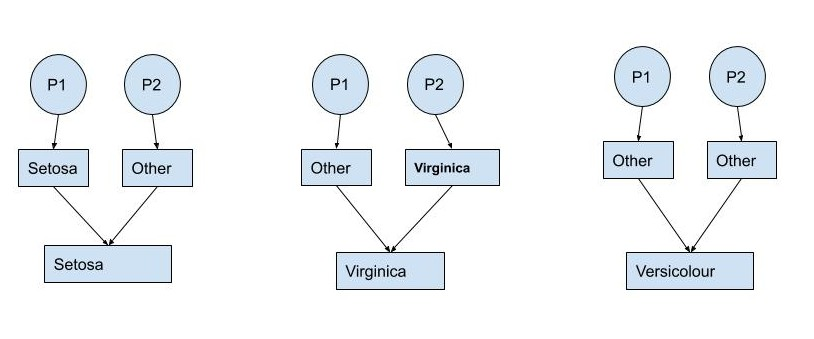

In [ ]:
def Perceptron(x,y,eta=0.1,epochs=50):
    """
        Input: Training data (xi,yi) i=1..m
               Epochs - no of runs throught the entire data
        Output: Weights w corresponding to each feature of x
                Bias of the hyperplane
    """
    w = np.array(np.ones(x.shape[1])) #same as the number of features
    b = -1

    for _ in range(epochs):
        #In each epoch, update weights for the misclassified data points
        for i in range(len(x)):      
                     
            if np.dot(x[i],w) + b < 0 and y[i] == 1:
                #A positive label wrongly classified as a negative label
                w = w + eta*x[i]
                b = b + eta*1
            
            elif np.dot(x[i],w) + b >= 0 and y[i] == 0:
                #A negative label wrongly classified as a positive label
                w = w - eta*x[i]
                b = b - eta*1
    return w,b

In [ ]:
def Predict(Xvalues,wPerceptron1,wPerceptron2,bPerceptron1,bPerceptron2):

    """
        Input: Test data (Xi)
               Weights and biases corresponding to two perceptron
               wPerceptron1,bPerceptron, wPerceptron2,bPerceptron2 
        Ouput: Array of prediction of the class labels
        Algorithm:
                Perceptron outputs value = 1 <W,x> + b >=0 
                Perceptron outputs value = 0 <W,x> + b <0
                
                Perceptron1 classifies as class 0 vs rest
                Perceptron1 has <W,x>+b >=0  for Iris Setosa/Class-0

                Perceptron2 classifies as class 2 vs rest                            
                Perceptron2 has <W,x>+b >=0  for Iris Virginica/Class-2

                __________________________________________________
                |Perceptron1  Perceptron2    Final prediction    |
                |------------------------------------------------|                         
                |class-0      rest           class-0             |
                |rest         class-2        class-2             |
                |rest         rest           class-1             |
                |                                                |
                --------------------------------------------------
    """
    predictions = []
    for x in Xvalues:
        res1 = np.dot(x,wPerceptron1)+bPerceptron1
        res2 = np.dot(x,wPerceptron2)+bPerceptron2
        
        if(res1 >= 0 and res2 <0):
            #case 1 - Perceptron1 predicts as class 0 and other perceptron predicts as rest
            predictions.append(0)        
        elif(res1 < 0 and res2 >=0):
            #case 2- Perceptron1 predicts as rest and other perceptron predicts as class 2
            predictions.append(2)
        elif(res1 < 0 and res2 < 0):
            #case 3- Perceptron1 predicts as rest and other perceptron predicts as rest 
            predictions.append(1)
        else:
            #misleading cases
            predictions.append(-1)

    return predictions

In [ ]:
from sklearn.datasets import load_iris
x = load_iris()['data']
y = load_iris()['target']
print(x.shape,y.shape)

(150, 4) (150,)


In [ ]:
#the data set has continous 0 class for 1-50, class-1 for 51-100 and class-2 for 101-150
#dividing the dataset for for training and testing

xtrain = np.vstack((x[:45] , x[50:95],x[100:145]))
ytrain = np.hstack((y[:45] , y[50:95] , y[100:145]))
xtest = np.vstack((x[45:50], x[95:100],x[145:]))
ytest = np.hstack((y[45:50], y[95:100], y[145:]))

In [ ]:
print("Training data")
print(xtrain.shape,ytrain.shape)
print("Testing data")
print(xtest.shape,ytest.shape)

In order to make a 3 class prediction,we can make use of two perceptrons.

1.   Perceptron 1 makes prediction as class 0 vs rest
2.   Perceptron 2 makes prediction as class 2 vs rest

# **The reason for choosing class 0 vs rest is seen in the below plot**

***Class 0[Iris Setosa] is separable from class 1[Iris Versicolour] and class 2[Iris Virginica] in all the 4 features***

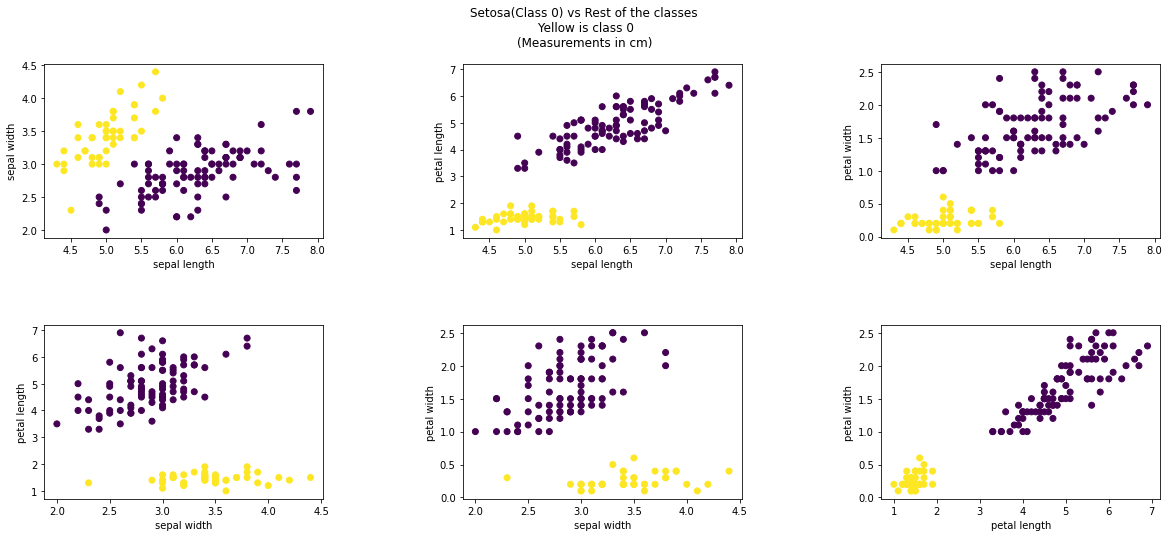

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(20,8))
plt.suptitle("Setosa(Class 0) vs Rest of the classes\n Yellow is class 0\n(Measurements in cm)")
plt.subplots_adjust(hspace=0.5,wspace=0.5)
axes[0,0].scatter(xtrain[:,0],xtrain[:,1],c=yPerceptron1)
axes[0,0].set_xlabel("sepal length"),axes[0,0].set_ylabel("sepal width")

axes[0,1].scatter(xtrain[:,0],xtrain[:,2],c=yPerceptron1)
axes[0,1].set_xlabel("sepal length"),axes[0,1].set_ylabel("petal length")

axes[0,2].scatter(xtrain[:,0],xtrain[:,3],c=yPerceptron1)
axes[0,2].set_xlabel("sepal length"),axes[0,2].set_ylabel("petal width")

axes[1,0].scatter(xtrain[:,1],xtrain[:,2],c=yPerceptron1)
axes[1,0].set_xlabel("sepal width"),axes[1,0].set_ylabel("petal length")

axes[1,1].scatter(xtrain[:,1],xtrain[:,3],c=yPerceptron1)
axes[1,1].set_xlabel("sepal width"),axes[1,1].set_ylabel("petal width")

axes[1,2].scatter(xtrain[:,2],xtrain[:,3],c=yPerceptron1)
axes[1,2].set_xlabel("petal length"),axes[1,2].set_ylabel("petal width")
plt.show()

# **The reason for choosing class 2 vs rest is seen in the below plot**

**class 2[Iris Virginica] is almost separable from class 1[Iris Versicolour] and Class 0[Iris Setosa] in all the 4 features**

[Although, it is hard to separate for sepal length and sepal width as there are flower belonging to both class 1 and class 2 that have smaller sepal width and medium sepal length [plot 1]]

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(20,8))
plt.suptitle("Iris Virginica(Class 2) vs Rest of the classes\n Yellow is class 2\n(Measurements in cm)")
plt.subplots_adjust(hspace=0.5,wspace=0.5)
axes[0,0].scatter(xtrain[:,0],xtrain[:,1],c=yPerceptron2)
axes[0,0].set_xlabel("sepal length"),axes[0,0].set_ylabel("sepal width")

axes[0,1].scatter(xtrain[:,0],xtrain[:,2],c=yPerceptron2)
axes[0,1].set_xlabel("sepal length"),axes[0,1].set_ylabel("petal length")

axes[0,2].scatter(xtrain[:,0],xtrain[:,3],c=yPerceptron2)
axes[0,2].set_xlabel("sepal length"),axes[0,2].set_ylabel("petal width")

axes[1,0].scatter(xtrain[:,1],xtrain[:,2],c=yPerceptron2)
axes[1,0].set_xlabel("sepal width"),axes[1,0].set_ylabel("petal length")

axes[1,1].scatter(xtrain[:,1],xtrain[:,3],c=yPerceptron2)
axes[1,1].set_xlabel("sepal width"),axes[1,1].set_ylabel("petal width")

axes[1,2].scatter(xtrain[:,2],xtrain[:,3],c=yPerceptron2)
axes[1,2].set_xlabel("petal length"),axes[1,2].set_ylabel("petal width")
plt.show()

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(20,8))
plt.suptitle("Iris Virginica(Class 2) vs Rest of the classes\n Yellow is class 2\n(Measurements in cm)")
plt.subplots_adjust(hspace=0.5,wspace=0.5)
axes[0,0].scatter(xtrain[:,0],xtrain[:,1],c=yPerceptron2)
axes[0,0].set_xlabel("sepal length"),axes[0,0].set_ylabel("sepal width")

axes[0,1].scatter(xtrain[:,0],xtrain[:,2],c=yPerceptron2)
axes[0,1].set_xlabel("sepal length"),axes[0,1].set_ylabel("petal length")

axes[0,2].scatter(xtrain[:,0],xtrain[:,3],c=yPerceptron2)
axes[0,2].set_xlabel("sepal length"),axes[0,2].set_ylabel("petal width")

axes[1,0].scatter(xtrain[:,1],xtrain[:,2],c=yPerceptron2)
axes[1,0].set_xlabel("sepal width"),axes[1,0].set_ylabel("petal length")

axes[1,1].scatter(xtrain[:,1],xtrain[:,3],c=yPerceptron2)
axes[1,1].set_xlabel("sepal width"),axes[1,1].set_ylabel("petal width")

axes[1,2].scatter(xtrain[:,2],xtrain[:,3],c=yPerceptron2)
axes[1,2].set_xlabel("petal length"),axes[1,2].set_ylabel("petal width")
plt.show()

In [ ]:
#make the labels as 1 for class-0 and rest of the labels will be 0 for perceptron1
yPerceptron1 = [1 if t==0 else 0 for t in ytrain] #finding class 0
print(yPerceptron1)
#make the labels as 1 for class-2 and rest of the labels will be 0 for perceptron2
yPerceptron2 = [1 if t==2 else 0 for t in ytrain] #finding class 2
print(yPerceptron2)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


***Running the Peceptron Learning Algorithm to choose the best learning rate for epoch = 50***

In [ ]:
#Perceptron training for two 
etas = [0.0001,0.001,0.01,0.1,1]
error_rates = []
for eta in etas:
    wPerceptron1,bPerceptron1  = Perceptron(xtrain,yPerceptron1,eta,50)
    wPerceptron2,bPerceptron2  = Perceptron(xtrain,yPerceptron2,eta,50)
    #find out what is predicted for the training data xtrain
    trainingPrediction = Predict(xtrain,wPerceptron1,wPerceptron2,bPerceptron1,bPerceptron2)
    #Number of misclassified training data points
    training_error = [ a==b for a,b in zip(ytrain,trainingPrediction)]
    error_rates.append((len(training_error)-sum(training_error))/len(ytrain))
    print("Learning Rate:{0} \nMisclassification rate in training data = {1}/{2}".format(eta,len(training_error)-sum(training_error),len(ytrain)))

Learning Rate:0.0001 
Misclassification rate in training data = 42/135
Learning Rate:0.001 
Misclassification rate in training data = 9/135
Learning Rate:0.01 
Misclassification rate in training data = 15/135
Learning Rate:0.1 
Misclassification rate in training data = 44/135
Learning Rate:1 
Misclassification rate in training data = 19/135


In [ ]:
#Error rates has the list of error rates found from the above procedure
#Select the eta for which training error is minimum

argmin_eta = np.argmin(error_rates)
best_eta = etas[argmin_eta]
print("The best values of eta is",best_eta)


#Recomputing the weights and bias for the best eta value
wPerceptron1,bPerceptron1  = Perceptron(xtrain,yPerceptron1,best_eta,50)
wPerceptron2,bPerceptron2  = Perceptron(xtrain,yPerceptron2,best_eta,50)

print(wPerceptron1 , bPerceptron1)
print(wPerceptron2 , bPerceptron2)

#find out what is predicted for the training data xtrain
trainingPrediction = Predict(xtrain,wPerceptron1,wPerceptron2,bPerceptron1,bPerceptron2)

#Number of misclassified training data points
training_error = [ a==b for a,b in zip(ytrain,trainingPrediction)]
print("Misclassification rate in training data = {0}/{1}".format(len(training_error)-sum(training_error),len(ytrain)))

The best values of eta is 0.001
[-0.0469  0.6502 -0.351   0.4591] -1.1129999999999876
[-0.3201  0.1362  0.3407  0.7799] -1.254999999999972
Misclassification rate in training data = 9/135


In [ ]:
print("True class labels of training data")
print(list(ytrain))
print("Predicted class labels of training data for eta={}".format(best_eta))
print(trainingPrediction)

print("There are {0} misclassified samples".format(len(training_error)-sum(training_error)))

True class labels of training data
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicted class labels of training data for eta=0.001
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
There are 9 misclassified samples


***Running the Perceptron learning to find a good epoch for the best eta selected from above***

In [ ]:
training_error_rates = []
testing_error_rates = []
for epc in range(10,100,10):
    wPerceptron1,bPerceptron1  = Perceptron(xtrain,yPerceptron1,best_eta,epc)
    wPerceptron2,bPerceptron2  = Perceptron(xtrain,yPerceptron2,best_eta,epc)
    trainingPrediction = Predict(xtrain,wPerceptron1,wPerceptron2,bPerceptron1,bPerceptron2)
    training_error = [ a==b for a,b in zip(ytrain,trainingPrediction)]
    training_error_rates.append((len(training_error)-sum(training_error))/len(ytrain))

    testPredicitons = Predict(xtest,wPerceptron1,wPerceptron2,bPerceptron1,bPerceptron2)
    testing_error = [ a==b for a,b in zip(ytest,testPredicitons)]
    testing_error_rates.append((len(testing_error)-sum(testing_error))/len(ytest))
print("Training error rates",[round(_,2) for _ in training_error_rates])
print("Testing error rates",[round(_,2) for _ in testing_error_rates])


Training error rates [0.3, 0.07, 0.07, 0.07, 0.07, 0.06, 0.06, 0.06, 0.06]
Testing error rates [0.27, 0.07, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


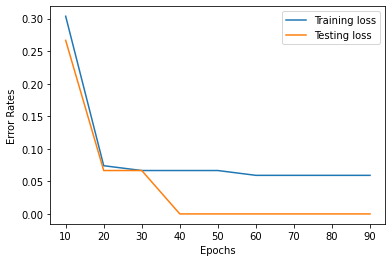

In [ ]:
plt.plot(range(10,101,10),training_error_rates,label="Training loss")
plt.plot(range(10,101,10),testing_error_rates,label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Error Rates")
plt.legend()
plt.show()

In [ ]:
#The predicted values for unseen data xtest
testPredicitons = Predict(xtest,wPerceptron1,wPerceptron2,bPerceptron1,bPerceptron2)

#Number of misclassified test data points
testing_error = [ a==b for a,b in zip(ytest,testPredicitons)]
print("Misclassification rate in training data = {0}/{1}".format(len(testing_error)-sum(testing_error),len(ytest)))

Misclassification rate in training data = 0/15


In [ ]:
print("True classes     ",list(ytest))
print("Predicted classes",testPredicitons)

True classes      [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
Predicted classes [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]


The result on test data can be seen in the below plot.

The left plot of each row is the actual class of the test data.

The right plot of each row is the predicted class of the test data.

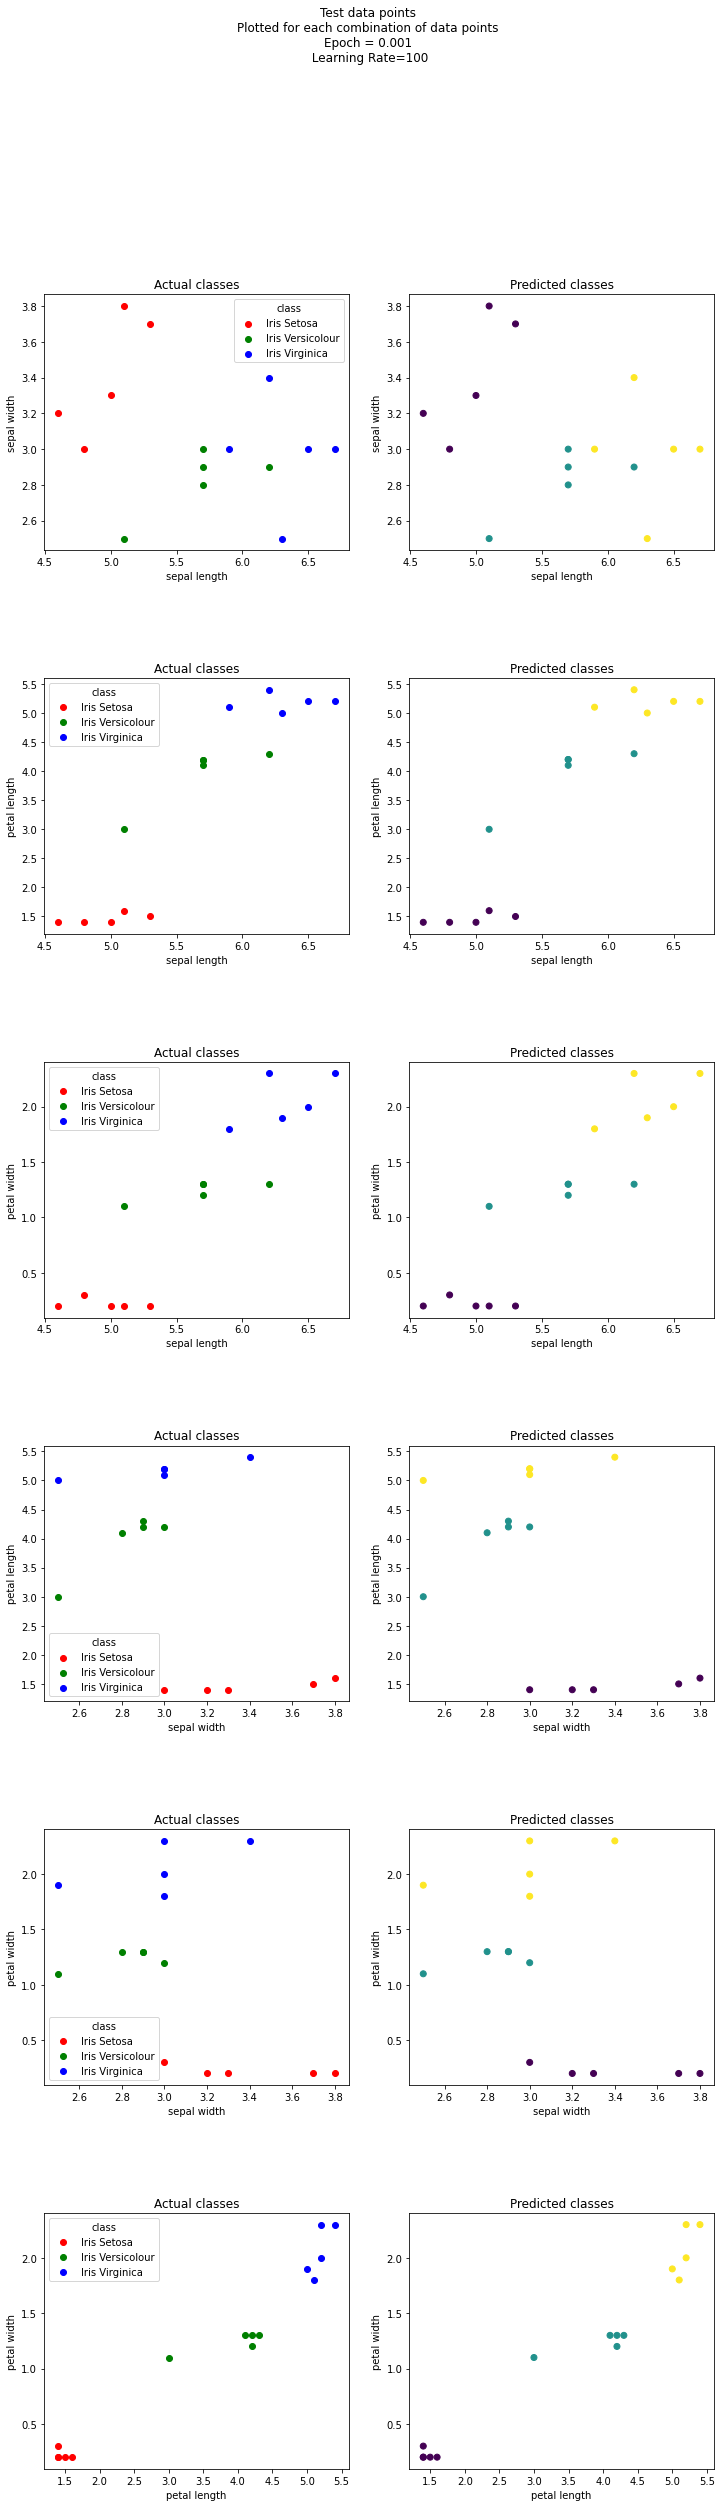

In [ ]:
labels = ["Iris Setosa","Iris Versicolour","Iris Virginica"]
features = ["sepal length","sepal width","petal length","petal width"]
feature_lables = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

fig,axes = plt.subplots(6,2,figsize=(12,40),gridspec_kw={'width_ratios': [6, 6]})
plt.suptitle("Test data points\nPlotted for each combination of data points\nEpoch = {0}\n Learning Rate={1}".format(best_eta,100))
plt.subplots_adjust(hspace=0.5)
for i in range(6):
    for j in range(1):
        #First index is taking particular class [ytest == i indicates the class]
        #Second index is picking the particular feature from feature lables
        axes[i,j].scatter(xtest[ytest==0,feature_lables[i+j][0]],xtest[ytest==0,feature_lables[i+j][1]],c='r')
        axes[i,j].scatter(xtest[ytest==1,feature_lables[i+j][0]],xtest[ytest==1,feature_lables[i+j][1]],c='g')
        axes[i,j].scatter(xtest[ytest==2,feature_lables[i+j][0]],xtest[ytest==2,feature_lables[i+j][1]],c='b')
        axes[i,j].set_xlabel(features[feature_lables[i+j][0]]),axes[i,j].set_ylabel(features[feature_lables[i+j][1]])
        axes[i,j].legend(title="class",labels=labels)
        axes[i,j].set_title("Actual classes")

        axes[i,j+1].scatter(xtest[:,feature_lables[i+j][0]],xtest[:,feature_lables[i+j][1]],c=testPredicitons)
        axes[i,j+1].set_xlabel(features[feature_lables[i+j][0]]),axes[i,j+1].set_ylabel(features[feature_lables[i+j][1]])
        axes[i,j+1].set_title("Predicted classes")
plt.show()